In [10]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input

In [11]:

# Define the paths and lists
path = '/content/drive/MyDrive/Yaleface/'
faces_path = []
class_label = []

# Loop through files, excluding .txt and .DS_Store files
for filename in os.listdir(path):
    if filename.endswith(".txt") or filename.endswith(".DS_Store"):
        continue
    else:
        img = load_img(os.path.join(path, filename), target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        faces_path.append(img)
        label = filename[7:9]
        class_label.append(label)


In [12]:
# Convert to NumPy arrays
faces_path = np.array(faces_path)
class_label = np.array(class_label)

In [13]:
# Create one-hot encoded labels
dd = {"labels": class_label}
dff = pd.DataFrame(dd)
One_hot_vec = pd.get_dummies(dff)

In [14]:
# Shuffle the data and split into training and test sets
X, y = shuffle(faces_path, One_hot_vec, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


In [26]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [27]:
# Define early stopping
earlyStopping = EarlyStopping(min_delta=0.01, patience=5, verbose=1, mode='auto')

# Train the model
history = model.fit(X_train, y_train, validation_split=0.20, epochs=20, batch_size=32, callbacks=[earlyStopping])


Epoch 1/20
4/4 [==============================] - 2s 250ms/step - loss: 3.4897 - accuracy: 0.1875 - val_loss: 2.4866 - val_accuracy: 0.3929
Epoch 2/20
4/4 [==============================] - 1s 154ms/step - loss: 1.1808 - accuracy: 0.6518 - val_loss: 1.0675 - val_accuracy: 0.8214
Epoch 3/20
4/4 [==============================] - 1s 165ms/step - loss: 0.3861 - accuracy: 0.9107 - val_loss: 0.9650 - val_accuracy: 0.7500
Epoch 4/20
4/4 [==============================] - 1s 155ms/step - loss: 0.1285 - accuracy: 0.9732 - val_loss: 0.5966 - val_accuracy: 0.8571
Epoch 5/20
4/4 [==============================] - 1s 165ms/step - loss: 0.0372 - accuracy: 1.0000 - val_loss: 0.3949 - val_accuracy: 0.8929
Epoch 6/20
4/4 [==============================] - 1s 154ms/step - loss: 0.0303 - accuracy: 0.9911 - val_loss: 0.3456 - val_accuracy: 0.9286
Epoch 7/20
4/4 [==============================] - 1s 165ms/step - loss: 0.0244 - accuracy: 0.9911 - val_loss: 0.3086 - val_accuracy: 0.9286
Epoch 8/20
4/4 [====

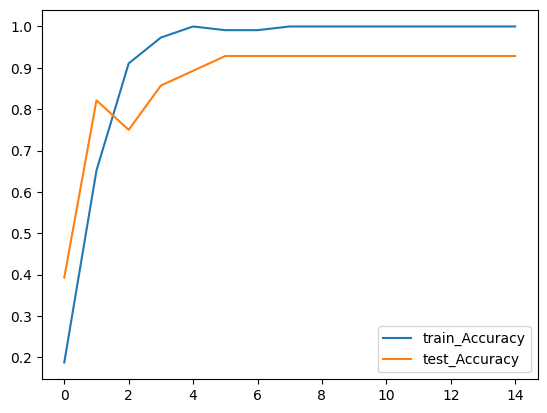

In [28]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'], label='train_Accuracy')
plt.plot(history.history['val_accuracy'], label='test_Accuracy')
plt.legend()
plt.show()

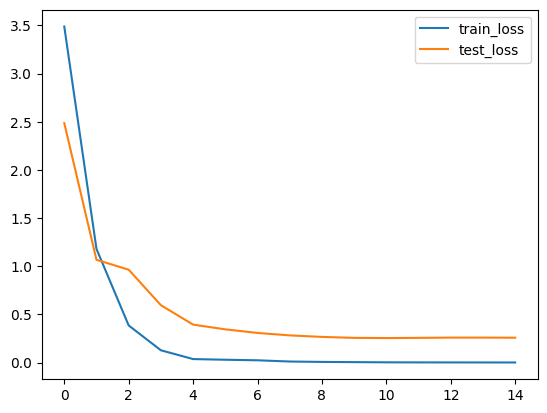

In [29]:
# Summarize history for loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()
